# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:185%; text-align:center; border-radius:10px 10px;">Support Vector Machines (SVM) Regression: Slump Test Data</p>

<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">Introduction

#### About the Dataset
The **concrete slump test** measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

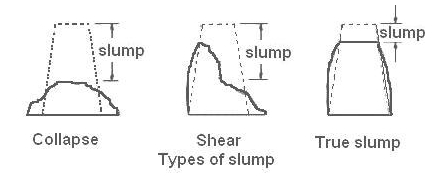

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*
</div>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Explore the Data

In [2]:
df = pd.read_csv('cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


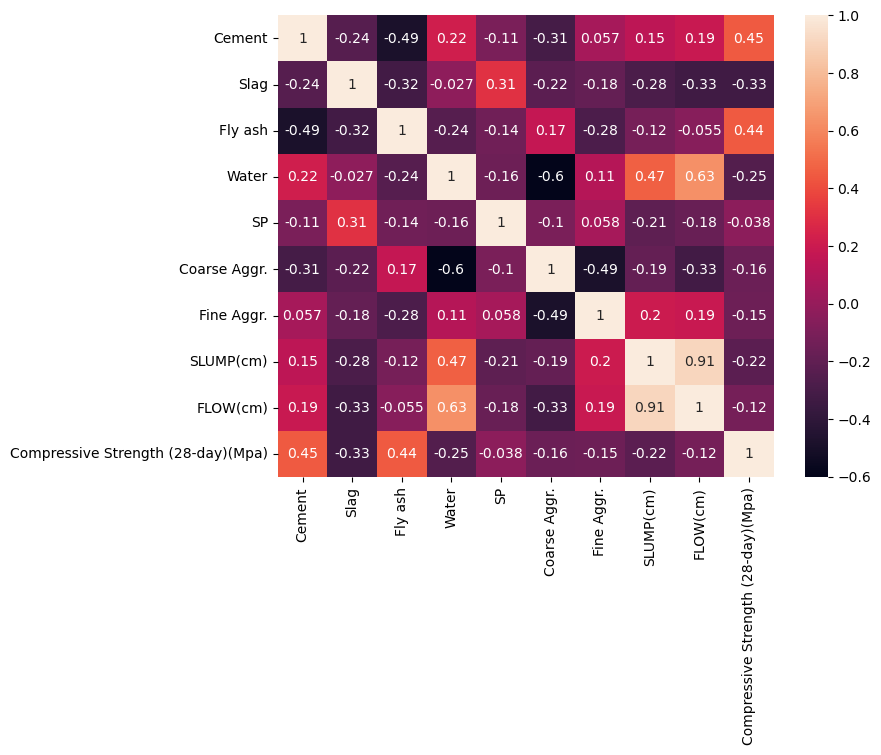

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True);

In [7]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## Train | Test Split and Scaling

Alternatively we could also set this up as a pipline, something like:

    >> from sklearn.pipeline import make_pipeline
    >> from sklearn.preprocessing import StandardScaler
    >> from sklearn.svm import SVR

    >> clf = make_pipeline(StandardScaler(), SVR())

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<div class="alert alert-warning alert-info">
    
## <span style=" color:#bf2e98"> Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: **SVR, NuSVR and LinearSVR**. 

LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.
</span>

In [14]:
from sklearn.svm import SVR,LinearSVR  # used in Linear kernel

In [15]:
# help(SVR)

<div class="alert alert-block alert-success">
    
<span style=" color:blue">

**Setting C:** C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer.

**epsilon:** The value of ϵ defines a margin of tolerance where no penalty is given to errors. In the same way, as with a classification approach, there is a motivation to seek and optimize the generalization bounds given for regression. They relied on defining the loss function that ignores errors, which are situated within a certain distance of the true value. This type of function is often called **epsilon intensive loss function**. The larger ϵ  is, the larger errors you admit in your solution. By contrast, if ϵ--> 0
, every error is penaliz.ed

For details, see: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression</span>

In [16]:
base_model = SVR() # default model

In [17]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [18]:
base_preds = base_model.predict(scaled_X_test)

## Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
# MAE
mean_absolute_error(y_test,base_preds)  # y_true, y_pred

5.236902091259179

In [21]:
# RMSE
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [22]:
y_test.mean()

36.26870967741935

## Grid Search for a better Model

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [25]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [26]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [27]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [28]:
grid_preds = grid.predict(scaled_X_test)

In [29]:
# Let's compare the default model with the grid model

# MAE
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [30]:
# RMSE
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347

**As a result, grid model performed better by reducing the error metrics. For example, it dropped RMSE from "6.69" to about "3.17".**